# Notebook for Studying Language Models

This notebook was created by Cesar Augusto Sanchez Villalobos to study and follow the series of videos by Andrej Karpathy.

## Initial exploration

In [101]:
words = open('data/names.txt', 'r').read().split()

# Printing the shortest word in the list
print('The longest name is:')
print(max(words, key=len))
print('\n The shortest name is:')
print(min(words, key=len))

# Checking the length of each word in the list
lenNames = list(len(x) for x in words)

# Check the names that are less than 5 characters
print('\nNames that are less than 5 characters:')
for name in words:
    if len(name) >= 4 and len(name) <= 6:
        print(name)
        
        

The longest name is:
muhammadibrahim

 The shortest name is:
an

Names that are less than 5 characters:
emma
olivia
sophia
amelia
harper
evelyn
emily
mila
ella
avery
sofia
camila
aria
luna
grace
chloe
layla
riley
zoey
nora
lily
hannah
aubrey
ellie
stella
leah
hazel
violet
aurora
audrey
bella
claire
skylar
lucy
everly
anna
nova
emilia
maya
willow
naomi
elena
sarah
ariana
alice
cora
ruby
autumn
hailey
gianna
isla
eliana
quinn
nevaeh
sadie
piper
lydia
alexa
emery
julia
vivian
kaylee
sophie
peyton
rylee
clara
hadley
reagan
aubree
jade
maria
athena
ximena
arya
taylor
faith
rose
kylie
mary
lyla
ashley
amaya
eliza
bailey
andrea
khloe
melody
iris
isabel
norah
adalyn
eden
kayla
alyssa
esther
ariel
alina
molly
reese
aliyah
lilly
parker
finley
morgan
sydney
jordyn
eloise
daisy
lauren
sara
elise
remi
teagan
alexis
london
sloane
laila
lucia
diana
sienna
londyn
ayla
callie
gracie
josie
amara
rachel
summer
alana
brooke
alaina
ember
rowan
joanna
paige
sawyer
mariah
nicole
payton
marley
fiona
lila
harl

In [102]:
# # Checking bigrams
# for word in words[:]: 
#     for ch1, ch2 in zip(word, word[1:]):
#         print(ch1, ch2)
#     print('\n')
t = {}
# Checking trigrams
for word in words[:]: 
    chs = ['<S>'] + list(word) + ['</E>']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        trigram = (ch1, ch2, ch3)
        t[trigram] = t.get(trigram, 0) + 1
        # print(t)
        # print(ch1, ch2, ch3)
    # print('\n')
    
# Sort t
# t = dict(sorted(t.items(), key=lambda x: x[1], reverse=True))

In [103]:
sorted(t.items(), key=lambda x: -x[1])

[(('a', 'h', '</E>'), 1714),
 (('n', 'a', '</E>'), 1673),
 (('a', 'n', '</E>'), 1509),
 (('o', 'n', '</E>'), 1503),
 (('<S>', 'm', 'a'), 1453),
 (('<S>', 'j', 'a'), 1255),
 (('<S>', 'k', 'a'), 1254),
 (('e', 'n', '</E>'), 1217),
 (('l', 'y', 'n'), 976),
 (('y', 'n', '</E>'), 953),
 (('a', 'r', 'i'), 950),
 (('i', 'a', '</E>'), 903),
 (('i', 'e', '</E>'), 858),
 (('a', 'n', 'n'), 825),
 (('e', 'l', 'l'), 822),
 (('a', 'n', 'a'), 804),
 (('i', 'a', 'n'), 790),
 (('m', 'a', 'r'), 776),
 (('i', 'n', '</E>'), 766),
 (('e', 'l', '</E>'), 727),
 (('y', 'a', '</E>'), 716),
 (('a', 'n', 'i'), 703),
 (('<S>', 'd', 'a'), 700),
 (('l', 'a', '</E>'), 684),
 (('e', 'r', '</E>'), 683),
 (('i', 'y', 'a'), 669),
 (('l', 'a', 'n'), 647),
 (('<S>', 'b', 'r'), 646),
 (('n', 'n', 'a'), 633),
 (('<S>', 'a', 'l'), 632),
 (('<S>', 'c', 'a'), 628),
 (('r', 'a', '</E>'), 627),
 (('n', 'i', '</E>'), 625),
 (('<S>', 'a', 'n'), 623),
 (('n', 'n', '</E>'), 619),
 (('n', 'e', '</E>'), 607),
 (('e', 'e', '</E>'), 605

## Convenient Torch way

In [104]:
import torch 

In [105]:
N = torch.zeros((28, 28), dtype=torch.int32)
characters = sorted(list(set(''.join(words))))
stringToIndex = {char: i for i, char in enumerate(characters)}
stringToIndex['<S>'] = 26
stringToIndex['</E>'] = 27

for w in words:
    chs = ['<S>'] + list(w) + ['</E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = stringToIndex[ch1]
        idx2 = stringToIndex[ch2]
        N[idx1, idx2] += 1
        

In [106]:
indexToString = {i: char for char, i in stringToIndex.items()}
indexToString

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '</E>'}

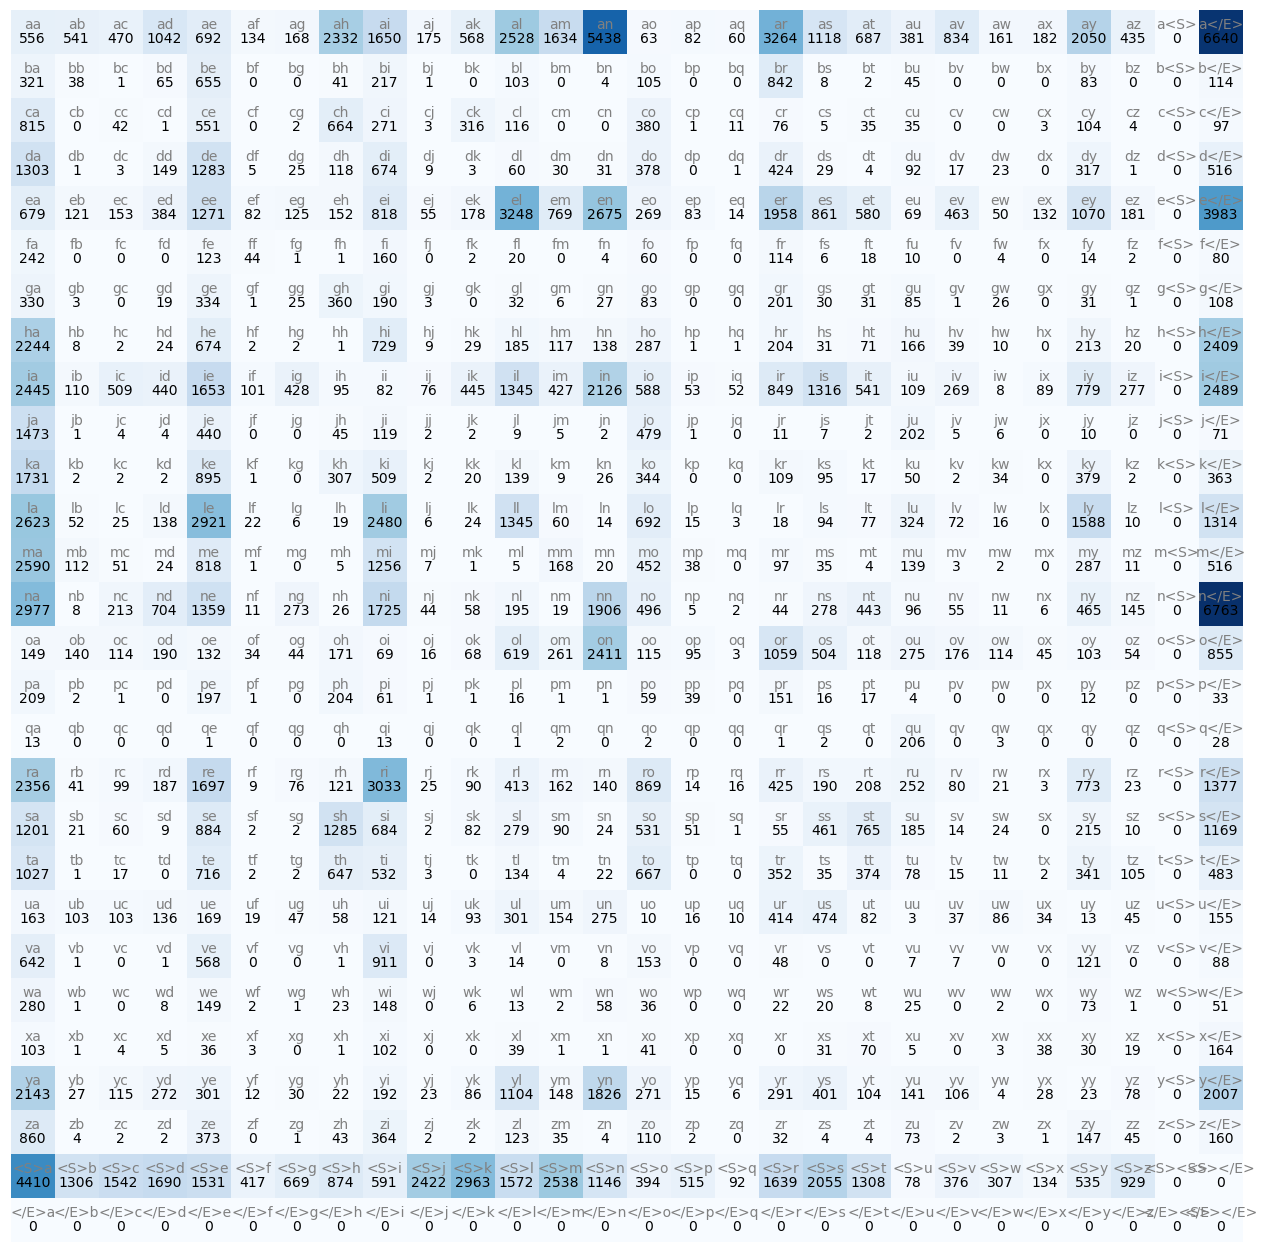

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 16))
plt.imshow(N, cmap='Blues')

for i in range(28):
    for j in range(28):
        chstr = indexToString[i] + indexToString[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='black')
        
plt.axis('off')
plt.show()

# Deleting spurious information:

In [108]:
N = torch.zeros((27, 27), dtype=torch.int32)
stringToIndex = {char: i+1 for i, char in enumerate(characters)}
stringToIndex['.'] = 0
indexToString = {i: char for char, i in stringToIndex.items()}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = stringToIndex[ch1]
        idx2 = stringToIndex[ch2]
        N[idx1, idx2] += 1

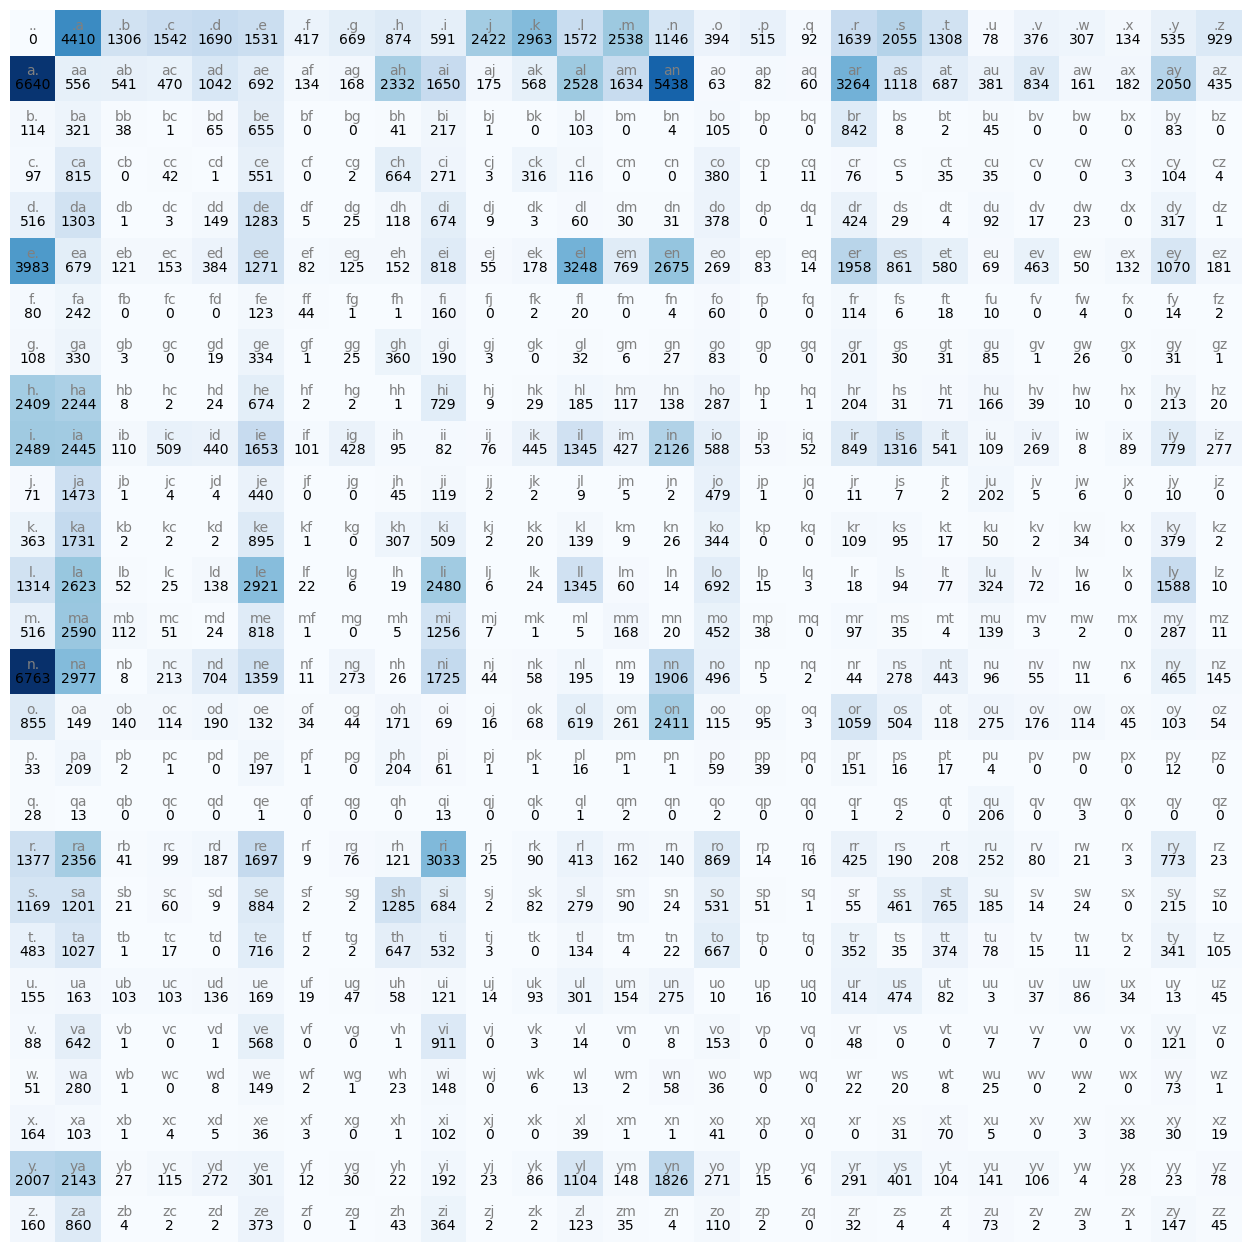

In [109]:
plt.figure(figsize = (16, 16))
plt.imshow(N, cmap='Blues')

for i in range(27):
    for j in range(27):
        chstr = indexToString[i] + indexToString[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='black')
        
plt.axis('off')
plt.show()

In [110]:
p = N[0,:].float()
p /= p.sum()
print(p.sum().item())

1.0


In [111]:
# Sample from the bigrams
g = torch.Generator().manual_seed(2024)
x = torch.multinomial(p, 1, replacement=True, generator=g).item()
indexToString[x]
P = N.float()
P = P/ P.sum(1, keepdim = True)  # BE CAREFUL WITH BROADCASTING
# P[0].sum()

In [120]:
g = torch.Generator().manual_seed(0)
for i in range(100):
    idx = 0
    out = []
    while True:
        p = P[idx,:]
        # p = N[idx,:].float()
        # p /= p.sum()
        # p = torch.ones(27)/27
        idx = torch.multinomial(p, 1, replacement=True, generator=g).item()
        out.append(indexToString[idx])
        # print(out)
        if idx == 0:
            break
    print(''.join(out))


bhrirerirco.
maren.
f.
lem.
a.
vieiynana.
sa.
l.
merlershonin.
aytty.
zade.
drilyarlll.
n.
ssos.
touson.
ainavibe.
seshi.
shanou.
say.
a.
khalalahlimemonasstele.
n.
kena.
sin.
m.
ces.
lobraniyin.
niyame.
mdejayneyn.
aitridanslunanallily.
camahamia.
mi.
rs.
briraskaryla.
tebayin.
caerou.
jatasaveerliaziereynoyppequsen.
a.
chaxyr.
bumma.
jariafaremi.
we.
ambdodyn.
s.
harl.
rakaizayatyn.
ckoiuaa.
bry.
majon.
beahona.
ynllmiyavy.
e.
kelen.
ke.
r.
dumiedy.
ama.
salan.
eyl.
beyselyannarthahaighiula.
dan.
mm.
mah.
jereeiycuiduweacarma.
may.
bahma.
rrubrevia.
detynss.
ileniozian.
hallll.
onyshaneladgrvonahonc.
s.
jiari.
ma.
n.
eli.
jan.
ka.
ganch.
jaa.
d.
j.
betr.
d.
kacahey.
r.
ka.
ce.
bedoricerlaya.
amendaira.
maumant.
bri.
kustonelele.
n.
rgh.
lla.
feriyma.
ana.
ma.
ahnah.


## Measuring the log-likelihood


In [113]:
log_likelihood = 0
n = 0

for word in words:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = stringToIndex[ch1]
        idx2 = stringToIndex[ch2]
        log_likelihood += torch.log(P[idx1, idx2])
        n += 1
        # print(f'{ch1} {ch2} {torch.log(P[idx1, idx2])}')

# Maximize the negative log likelihood (normalized by the number of characters in the corpus)
print(-log_likelihood/n)

tensor(2.4541)


# Neural Network way:

In [114]:
# Create the training set:

xs, ys = [], []
for word in words:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        xs.append(stringToIndex[ch1])
        ys.append(stringToIndex[ch2])
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [115]:
import torch.nn.functional as F

# One hot encoding
xenc = F.one_hot(xs, num_classes = 27).float()
yenc = F.one_hot(ys, num_classes = 27).float()



## Simple NN

### The Forward Pass:

In [116]:
g = torch.Generator().manual_seed(2024)
W = torch.randn((27, 27), generator=g, requires_grad=True)
print(W[0])

# Forward Pass
logits = xenc @ W # log-counts
counts = logits.exp()
probs = counts/counts.sum(1, keepdim = True)
loss = -probs.log().mean()

# Backward Pass
loss.backward()
W.data -= 0.1*W.grad
W[0]

tensor([-1.2262, -0.0093,  1.5420, -0.4657,  0.2795, -0.2610,  0.6230, -1.1561,
         0.1171, -1.8865,  2.1822, -0.1930,  0.5358, -0.8898, -0.3099,  0.7741,
         0.1236, -2.1807,  0.3700,  0.4144,  1.8567,  1.9776, -0.4322,  1.3667,
         0.8432, -0.0421,  1.6579], grad_fn=<SelectBackward0>)


tensor([-1.2258, -0.0090,  1.5413, -0.4653,  0.2797, -0.2606,  0.6230, -1.1557,
         0.1173, -1.8860,  2.1806, -0.1926,  0.5359, -0.8894, -0.3096,  0.7741,
         0.1239, -2.1802,  0.3701,  0.4146,  1.8557,  1.9763, -0.4318,  1.3663,
         0.8431, -0.0418,  1.6572], grad_fn=<SelectBackward0>)

# Can we optimize W to get the proper probabilities?

In [117]:
# Gradient Descent:

g = torch.Generator().manual_seed(2024)
W = torch.randn((27, 27), generator=g, requires_grad=True)

learning_rate = 50
for i in range(1000):
    logits = xenc @ W
    counts = logits.exp()
    probs = counts/counts.sum(1, keepdim = True)
    loss = -probs[torch.arange(len(ys)), ys].log().mean()
    loss.backward()
    W.data -= learning_rate*W.grad
    W.grad = None
    print(loss.item())

3.8398091793060303
3.4243996143341064
3.1751842498779297
3.027959108352661
2.929870843887329
2.8561084270477295
2.80025053024292
2.757662534713745
2.724465847015381
2.6977365016937256
2.6755661964416504
2.656785249710083
2.640655755996704
2.6266748905181885
2.6144704818725586
2.603749990463257
2.5942752361297607
2.585852861404419
2.5783231258392334
2.5715553760528564
2.5654430389404297
2.5598974227905273
2.5548458099365234
2.550227165222168
2.5459887981414795
2.5420875549316406
2.5384860038757324
2.5351521968841553
2.532057523727417
2.5291781425476074
2.5264925956726074
2.523982524871826
2.5216314792633057
2.5194251537323
2.5173499584198
2.5153956413269043
2.513551712036133
2.511808395385742
2.5101583003997803
2.5085935592651367
2.507107734680176
2.505695104598999
2.504350185394287
2.503068208694458
2.501844644546509
2.500676155090332
2.499558210372925
2.498487710952759
2.4974615573883057
2.4964778423309326
2.4955332279205322
2.4946253299713135
2.493752956390381
2.492912769317627
2.492

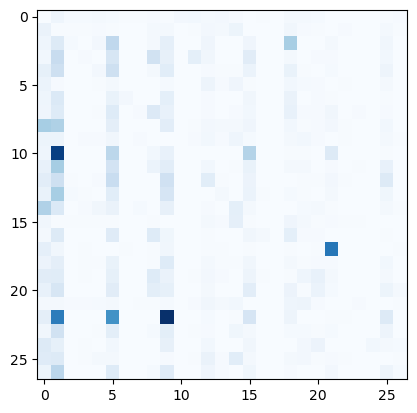

In [118]:
plt.imshow((W.exp()).detach().numpy(), cmap='Blues')  

In [125]:
# Sample from the model
g = torch.Generator()
for i in range(100):
    idx = 0
    out = []
    while True:
        p = (W[idx,:]).exp()
        idx = torch.multinomial(p, 1, replacement=True,).item()
        out.append(indexToString[idx])
        if idx == 0:
            break
    print(''.join(out))


maini.
halyn.
m.
vah.
rfth.
aray.
gethan.
aleio.
ana.
maran.
a.
ereve.
a.
con.
rioi.
keeiadeyn.
ja.
asash.
a.
lylinzavelyniahaxan.
karahte.
my.
kah.
bridoridra.
ll.
vell.
n.
rabosh.
bianav.
dranyaseyaeyn.
r.
man.
jamelajail.
jorikynn.
deryl.
lle.
de.
ddhashamaho.
za.
ckennahiandreush.
dlirirosa.
a.
bahelerom.
rmolyn.
yray.
pa.
ja.
s.
me.
jarai.
are.
gesos.
gerahan.
e.
ranzesonin.
mbrade.
jon.
aylliysrkmax.
bin.
stes.
ab.
seylelavielama.
shizakoulystettzarque.
fabd.
reylvimenn.
zy.
shrscoionishah.
anorah.
aerar.
javinodiaan.
ubevieelia.
e.
yayriraranaiar.
erin.
sit.
manne.
a.
rikha.
ee.
yome.
da.
i.
cafeygria.
jai.
yrmon.
bonieroahvex.
mei.
jan.
bratomeario.
m.
on.
ezemy.
ha.
lusauahenciynylevi.
sy.
jouran.
yleyn.
caso.
kin.
anmoh.
